In [2]:
import pandas as pd
import seaborn as sns            
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt  

In [3]:
df_fd = pd.read_csv(r'full_data.csv')
 #df=pd.read_csv("C:/Users/inu/Documents/ia/trabajo practico 1/dataset/weather.csv")
sns.set_style('darkgrid')
df_fd.head(100)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
95,Male,71.0,1,1,No,Govt_job,Rural,216.94,30.9,never smoked,1
96,Male,61.0,1,0,Yes,Self-employed,Rural,76.11,27.3,smokes,1
97,Male,74.0,0,0,Yes,Private,Urban,72.96,31.3,smokes,1
98,Female,38.0,0,0,No,Self-employed,Urban,82.28,24.0,formerly smoked,1


### Curacion de datos

In [4]:

df_copy = df_fd.copy()

# reemplaza las columnas smoking status, residence type, work type por variables dummys binarias

df_copy = pd.get_dummies(df_fd, columns=['smoking_status', 'work_type'])


# de la columna "ever_married" se reemplazan los valores "Yes" por 1 y "No" por 0
df_copy['ever_married'] = df_copy['ever_married'].replace(['Yes'], 1)
df_copy['ever_married'] = df_copy['ever_married'].replace(['No'], 0)

# de la columna "gender" del dataframe df_fd, reemplaza Male por 1 y Female por 0
df_copy['gender'] = df_copy['gender'].replace(['Male'], 1)
df_copy['gender'] = df_copy['gender'].replace(['Female'], 0)

# de la columna "residence type" se reemplazan los valores "urban" por 1 y "rural" por 0

df_copy['Residence_type'] = df_copy['Residence_type'].replace(['Urban'], 1)
df_copy['Residence_type'] = df_copy['Residence_type'].replace(['Rural'], 0)


df_copy.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,1,0,0
2,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,1,0,0
3,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0


In [5]:
df_fd.isnull().values.any()

False

Para la parte de la curacion de datos, se reemplazaron las variables categoricas por variables dummy para poder meterlos en el modelo de regresion.
No se encontraron valores null ni se considero necesario eliminar valores.

### Graficos



In [6]:
#sns.pairplot(df_fd, palette = "Spectral")

# grafica bmi vs age

#sns.scatterplot(x = df_fd['age'], y = df_fd['bmi'], hue = df_fd['stroke'])


#plt.show()

<AxesSubplot:xlabel='age', ylabel='bmi'>

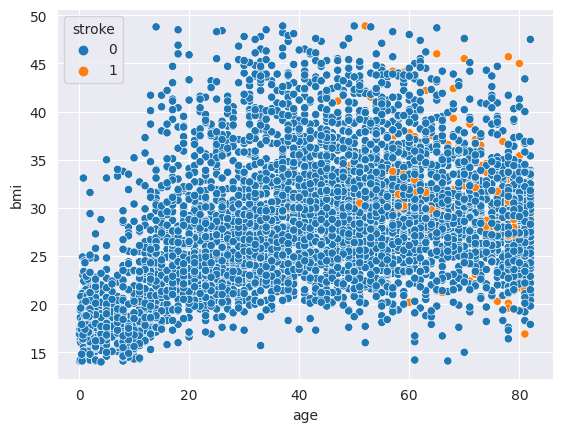

In [7]:
#grafica bmi vs avg_glucose_level

sns.scatterplot(x = df_fd['age'], y = df_fd['bmi'], hue = df_fd['stroke'])


En este primer grafico se puede ver la edad vs bmi. Se puede ver que a medida que la persona tiene mas edad, tiene a tener mas bmi. Ademas, se puede ver como los strokes se acumulan con mas frecuencia en las personas con mas edad y bmi.

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

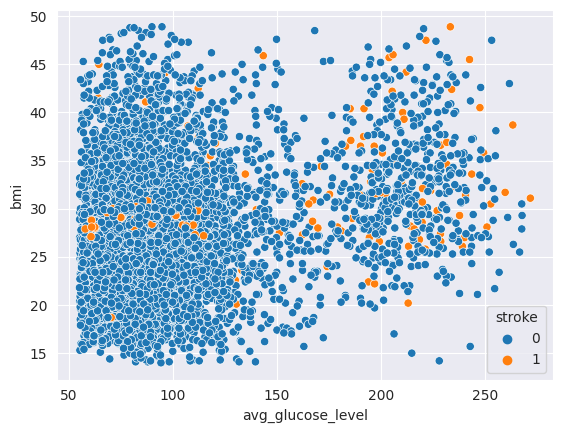

In [8]:
# grafica avg_glucose_level vs bmi

sns.scatterplot(x = df_fd['avg_glucose_level'], y = df_fd['bmi'], hue = df_fd['stroke'])


En este grafico se ve como la mayoria de los puntos con stroke se concentran a la derecha. Osea, a mas bmi y glucosa promedio, se ve que se acumulan mas stroke.

### Regresion lineal multiple

In [13]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as cr


X_multiple = df_copy[['stroke', 'bmi', 'hypertension', 'heart_disease', 'avg_glucose_level',
'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'smoking_status_Unknown',
'Residence_type',
'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 
'ever_married']]
  
# X_multiple = df_copy[['bmi', 'ever_married', 'hypertension', 'heart_disease', 'avg_glucose_level', 'stroke']]

Y_multiple = df_copy['age']

X_train, X_test, Y_train, Y_test = train_test_split(X_multiple, Y_multiple, test_size = 0.2, random_state=42)
regresion_multiple = linear_model.LinearRegression()
regresion_multiple.fit(X_train,Y_train)

coef_regresion = regresion_multiple.coef_
intecept_y = regresion_multiple.intercept_

print("Las pendiente de las rectas son",coef_regresion, "y la interseccion es",intecept_y )

predict = regresion_multiple.predict(X_test)
mean_squared_error(Y_test, predict)
score = regresion_multiple.score(X_test, Y_test)

print("El score es de", (score))

# usa el modelo calculado para predecir la edad de una persona con los siguientes datos:
# bmi = 30, ever_married = 1, hypertension = 1, heart_disease = 0, avg_glucose_level = 100, stroke = 0


predict = regresion_multiple.predict([[0, 30, 1, 0, 100, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1]])
print("La edad predicha es de", predict, "la edad real es de 50")


Las pendiente de las rectas son [ 12.42000775  -0.03336065   8.38967711  13.49298659   0.04122721
   3.06523358  -0.23402113  -2.06301886  -0.7681936    0.42256835
   5.20284845   2.19028239  12.81173512 -20.20486596  18.51186858] y la interseccion es 24.33729119906012
El score es de 0.6543615423769749
La edad predicha es de [56.20539499] la edad real es de 50


/home/sebastian/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Primeramente, se cambiaron todas las variables de tipo categoricas por variables dummy. De esta forma, es posible incluirlas en el analisis hecho con la regresion lineal multiple.

En este caso, se incluyeron todos los atributos disponibles menos el **genero**, que lo consideramos irrelevante para nuestra variable target que es la **edad**. Encontramos que nuestro modelo tiene un score de 0.65.

Se le pide al modelo que prediga la edad de una persona dandole ciertos valores inventados, y el modelo predice que tiene 56 años, cuando la persona tiene 50.

### TP1 PARTE 2

In [16]:
inputs = df_copy.drop(columns=['stroke'])
target = np.array(df_fd['stroke'])
inputs = np.array(inputs)
train_inputs, test_inputs, train_target, test_target= train_test_split(inputs, target, test_size= 0.2, random_state=42)


min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train_inputs)
X_test_minmax = min_max_scaler.fit_transform(test_inputs)


train_inputs_manmax = min_max_scaler.fit_transform(train_inputs)

train_targetbin = np.array(train_target)

# convierte train_target bin de un vector fila a un vector columna

train_targetbin = train_targetbin.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()

reglog = LogisticRegression( class_weight = 'balanced' ) # balancea los pesos de las clases para que no haya sesgo
reglog.fit(train_inputs_manmax, train_targetbin)


test_targetbin=np.array(test_target)
test_targetbin=test_targetbin.reshape(-1,1)

test_inputs_manmax=min_max_scaler.fit_transform(test_inputs)
pred = reglog.predict(test_inputs_manmax)

accuracy = accuracy_score(test_targetbin, pred)

print("El accuracy es de", accuracy)



El accuracy es de 0.7352056168505516


/home/sebastian/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
cm = confusion_matrix(test_targetbin, pred)
print(cm)

[[688 255]
 [  9  45]]


Inicialmente, se encontro que nuestro modelo tiene un score del 94%. Los resultados de la matriz de confusion para este caso fueron:

- 943 negativos verdaderos
- 0 falsos negativos
- 54 falsos positivos
- 0 positivos verdaderos

Lo que muestra, que nuestro modelo esta prediciendo siempre que la persona no tuvo un *stroke*, y esta teniendo un 94% de precision. Nuestro modelo no esta prediciendo nunca un positivo, y esto es porque la carga, o el peso de los datos esta **desbalanceado**. En nuestra base de datos, la cantidad de personas que **si** tienen un stroke son muy pocas en comparacion contra las que **no** tienen un stroke, por lo que el modelo aprende a siempre predecir un no, y con ello tiene una precision altisima. Para arreglar esto, decidimos balancear la carga de los datos, para que el 50% de los casos tomados sean un positivo en stroke, y el otro 50% sea negativo en stroke.

Para esta ejecucion, se puede observar un score del 73%, y para la matriz de confusion se puede observar:

- 688 negativos verdaderos
- 255 falsos negativos
- 9 falsos positivos
- 45 positivos verdaderos

Mejorando significativamente el modelo.



In [12]:
print(cr(test_targetbin, pred))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       943
           1       0.15      0.83      0.25        54

    accuracy                           0.74       997
   macro avg       0.57      0.78      0.55       997
weighted avg       0.94      0.74      0.81       997

